In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Derivation of ODEs
The Blasius equation is given by:
$$f^{'''}(x) + \frac{1}{2}f(x)f^{''}(x)=0$$

Substituting the following variables
$$ g(x) = f^{'}(x)$$
$$ h(x) = g^{'}(x)$$

Gives the following set of ODE
$$f^{'}(x) = g(x) $$
$$g^{'}(x) = h(x) $$
$$h^{'}(x) = -\frac{1}{2}f(x)h(x) $$

Using forward Euler for the discretization gives:
$$f^{'}(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} $$
$$g^{'}(x) = \frac{g(x+\Delta x) - g(x)}{\Delta x} $$
$$h^{'}(x) = \frac{h(x+\Delta x) - h(x)}{\Delta x} $$

Substituting in the equation gives:

$$f(x+\Delta x) = g(x)\Delta x+f(x)$$
$$g(x+\Delta x) = h(x)\Delta x+g(x)$$
$$h(x+\Delta x) = -\frac{1}{2}f(x)h(x)\Delta x+h(x)$$

## Solve ODEs

In [84]:
#discretization
n=200000
x = np.append(np.array([0]),np.logspace(-3,1,n-1))
# x = np.linspace(0,10,n)

dx = np.diff(x)
f = np.zeros(n)
g = np.zeros(n)
h = np.zeros(n)

In [87]:
error =1
h[0] = .1
dh = .1;
while (error > 1.0e-6):
    #apply bc
    f[0] = 0.0
    g[0] = 0.0
    
    #solve equation
    for i in range(0,n-1):
        ip = i+1
        f[ip] =            g[i]*dx[i] + f[i]
        g[ip] =            h[i]*dx[i] + g[i]
        h[ip] =   -(1/2)*f[i]*h[i]*dx[i] + h[i]
    
    #update bc
    if (g[-1] < 1.0):
        h[0] = h[0] + dh;
    else:
        h[0] = h[0] - dh;
        dh = dh/2;
        h[0] = h[0] + dh;
    #calc error
    error = abs(1-g[-1])

## Plot solution

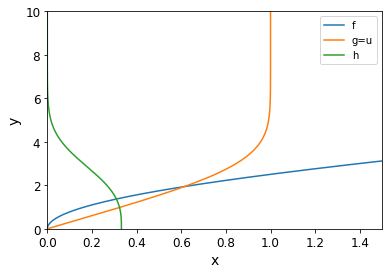

In [95]:
fig, ax = plt.subplots()
ax.plot(f,x, label='f')
ax.plot(g,x, label='g=u')
ax.plot(h,x, label='h')
# ax.set_yscale("log")
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.tick_params(labelsize=12)
ax.legend()
ax.set_xbound(0,1.5)
ax.set_ybound(0,10)
plt.savefig("blasius_cp.png")

## Store solution

In [92]:
df = pd.DataFrame(np.array([x,f,h,g]).T,columns=['x','f','g','h'])
df.to_csv("blasius_cp.csv",index=None, sep="\t", header=True)